P3> Plot average BoxOffice Collection by Genre for combined dataset
What is your inference from this?
How does this average change when we pick only Bollywood movies?
What is your inference now?


-- importing necessary modules and dataset for analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df_bollywood = pd.read_excel("bollywood_movies.xlsx")
df_tollywood = pd.read_excel("tollywood_movies.xlsx")
df_indian = pd.read_excel("indian_movies.xlsx")

In [47]:
df_bollywood.head(),df_indian.head(),df_tollywood.head()

(   index MovieID                         Title            Director  \
 0      0  MOV001                        Lagaan  Ashutosh Gowariker   
 1      1  MOV002   Kabhi Khushi Kabhie Gham...         Karan Johar   
 2      2  MOV003  M.S. Dhoni: The Untold Story       Neeraj Pandey   
 3      3  MOV004   Baahubali 2: The Conclusion     S. S. Rajamouli   
 4      4  MOV005               Chennai Express        Rohit Shetty   
 
                        Genre  ReleaseYear  Budget (Crores)  \
 0    Historical Sports Drama         2001               50   
 1               Family Drama         2001               50   
 2  Biographical Sports Drama         2016               50   
 3        Epic Fantasy Action         2017              250   
 4              Action Comedy         2013               50   
 
    BoxOffice (Crores)  Rating  Duration (minutes)             LeadActor  \
 0                 100     8.1                 224            Aamir Khan   
 1                 100     7.9          

-- To compute Avg BoxOffice Collection we group the combined dataset by Genre and
calculate the average BoxOffice collection for each Genre.

In [48]:
df_combined = pd.concat([df_bollywood, df_tollywood, df_indian])
df_combined.head()

,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,0,MOV001,Lagaan,Ashutosh Gowariker,Historical Sports Drama,2001,50,100,8.1,224,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions
1,1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001,50,100,7.9,210,Shah Rukh Khan,Kajol,Hindi,Dharma Productions
2,2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016,50,215,7.9,184,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios
3,3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017,250,1810,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works
4,4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013,50,423,6.4,141,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment


-- combining dataset 

In [49]:
df_pvt = df_combined[['MovieID', 'Title', 'BoxOffice (Crores)']]
df_pvt

,MovieID,Title,BoxOffice (Crores)
0,MOV001,Lagaan,100
1,MOV002,Kabhi Khushi Kabhie Gham...,100
2,MOV003,M.S. Dhoni: The Untold Story,215
3,MOV004,Baahubali 2: The Conclusion,1810
4,MOV005,Chennai Express,423
...,...,...,...
13,MOV039,Forensic (Kannada Dubbed),250
14,MOV040,Trance (Kannada Dubbed),250
15,MOV042,K.G.F: Chapter 1,250
16,MOV046,Aruvi,5


-- using parameter as_index=False  for genre so that 'group by' result is in dataframe and easy to sort by a column value

In [50]:
df_res = df_combined.groupby('Genre', as_index=False)['BoxOffice (Crores)'].mean()
sorted_df=df_res.sort_values(by='BoxOffice (Crores)')
sorted_df

,Genre,BoxOffice (Crores)
22,Sports Drama,45.000000
21,Sports Action,55.000000
12,Historical Sports Drama,83.500000
4,Biographical Drama,85.000000
25,Thriller,91.285714
9,Family Drama,100.000000
7,Drama,111.666667
16,Romantic Comedy,135.600000
15,Romance,155.500000
17,Romantic Drama,178.333333


-- Plot the result

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

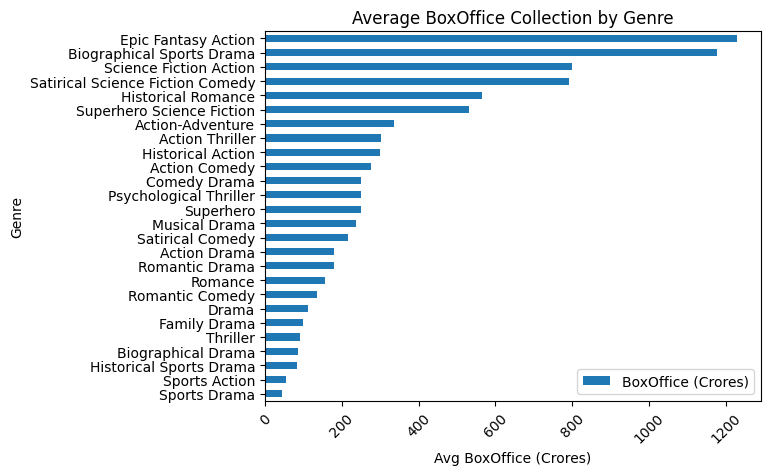

In [51]:
ax = sorted_df.plot(
    x='Genre', 
    y='BoxOffice (Crores)', 
    kind='barh', 
    legend=True, 
    title='Average BoxOffice Collection by Genre'
)

ax.set_xlabel("Avg BoxOffice (Crores)")
ax.set_ylabel("Genre")
plt.xticks(rotation=45)

-- Now to Compute the Average BoxOffice collection for Bollywood Movies only,
we can use df_bollywood table and perform calculation
Group by Genre and compute the average BoxOffice collection

In [52]:
df_res = df_bollywood.groupby('Genre', as_index=False)['BoxOffice (Crores)'].mean()
df_res=df_res.sort_values(by='BoxOffice (Crores)')

-- plotting the result

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

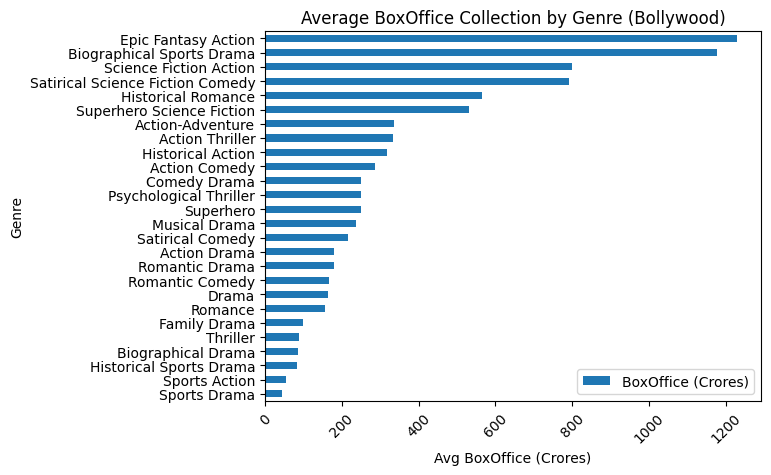

In [53]:
ax = df_res.plot(
    x='Genre', 
    y='BoxOffice (Crores)', 
    kind='barh', 
    legend=True, 
    title='Average BoxOffice Collection by Genre (Bollywood)'
)

ax.set_xlabel("Avg BoxOffice (Crores)")
ax.set_ylabel("Genre")
plt.xticks(rotation=45)

## Inference
- Since Bollywood has all genre types, analyzing the full dataset or only Bollywood movies gives the same result.
- Bollywood movies have all genres, it means the parent dataset (full dataset) and the Bollywood-only dataset contain the same genre categories.
- So when we take the average Box Office collections by genre, the plots look exactly the same.
- Simple dramas and sports movies make less money, while action, fantasy, and superhero movies earn the most.
- The highest box office collections come from big-budget genres like Sci-Fi, Superhero, and Historical Fantasy.






